# Lab 4: Maximum Likelihood Estimation

**Author:** [YOUR NAME]

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Practice different estimation methods to find the best PDF for mass distribution data

In this lab, we will analyze a mass distribution dataset using the **Cauchy distribution** (also known as Lorentz or Breit-Wigner distribution). The Cauchy distribution has two parameters:
- **Location parameter (m)**: central mass value
- **Scale parameter (Γ)**: width of the distribution

**Documentation:** [scipy.stats.cauchy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html)

## Setup and Data

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import cauchy

In [3]:
# Mass distribution dataset (Units: GeV)
mass = [7.95442531, 10.60408232, 9.9020277, 10.42288788, 17.2193401, 10.06076572,
        10.00176003, 7.8289388, 9.55481385, 9.99981543, 10.3156156, 10.70547087,
        9.80374407, 7.62085689, 9.60747351]

**Your theoretical prediciton**
- What Cauchy distribution is it? Try many centers and widths to match the data!

# Task 1: Visualization (3 points)

Create two types of visualizations for the mass distribution data.

## Part (a): Unbinned Distribution

Draw the unbinned mass distribution showing individual data points as a scatter plot.

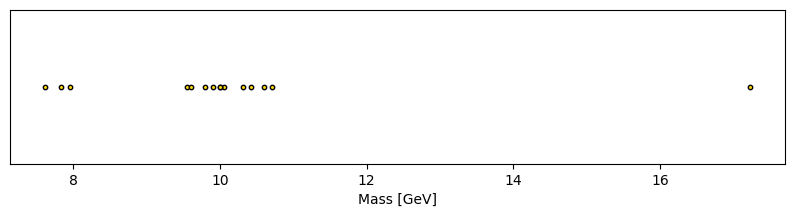

In [10]:
# TODO: Create a scatter plot showing individual mass measurements
fig, ax = plt.subplots(figsize=(10,2))

y = np.zeros_like(mass) # scatter baseline

ax.scatter(mass, y, color='gold', edgecolor='black', s=10, zorder=3)
ax.set_xlabel("Mass [GeV]")
ax.set_yticks([]) # turns off y axis ticks ( we don't need it!)
plt.show()

## Part (b): Binned Distribution with Error Bars

Create a histogram with bin size 0.5 GeV (range 0-20 GeV) including Poisson error bars.

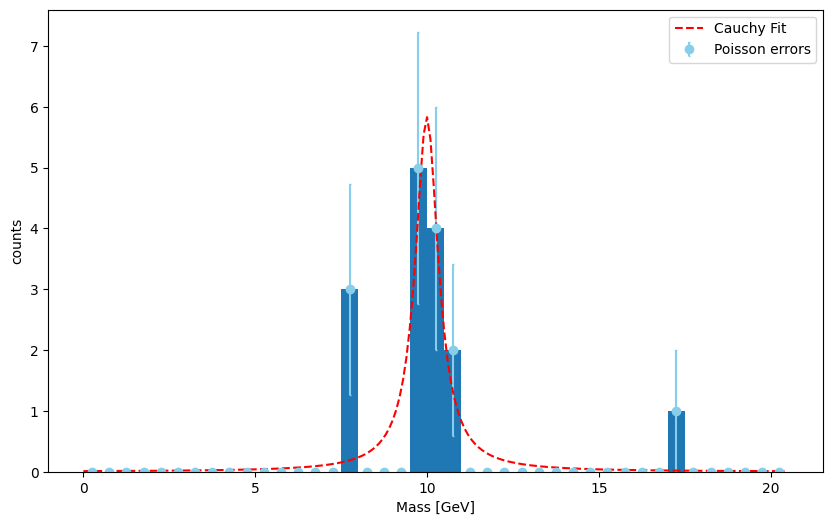

In [25]:
# TODO: Create histogram with error bars (use sqrt(N) for Poisson errors) 

binSize = 0.5
# histogram params
bins = np.arange(0, 21, binSize)
counts, edges = np.histogram(mass, bins=bins)
centers = 0.5 * (edges[:-1] + edges[1:]) # for errorbars

errors = np.sqrt(counts)  # Poisson errors

# plot
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(edges[:-1], edges, weights=counts)
ax.errorbar(centers, counts, yerr=errors, fmt='o', color='skyblue', capsize=1, label='Poisson errors')
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("counts")


# TODO: Overplot your theoretical Cauchy PDF match histogram (scales from probability to expected counts per bin)

loc, scale = cauchy.fit(mass)
dist = cauchy(loc=loc, scale=scale)

xx = np.arange(0, 20.5, 0.1) #dummy x
yy = dist.pdf(xx) * (binSize * len(mass)) # scale factor for pdf -> count
ax.plot(xx,yy, '--', color='r', label='Cauchy Fit')
ax.legend()
plt.show()

# Task 2: Maximum Likelihood Estimation (4 points)

Use maximum likelihood estimation to find the best-fit parameters for the Cauchy distribution.

## Part (a): Negative Log-Likelihood Function

Construct an unbinned negative log-likelihood function that returns -2*log(L) for the Cauchy distribution.

In [28]:
# TODO: Create your NLL function. HINT: Calculate log-likelihood using scipy.stats.cauchy.logpdf

def nll_cauchy(data, loc, scale):
    logL = cauchy.logpdf(data, loc=loc, scale=scale)
    nll = -2 * np.sum(logL)  # -2 * log L
    return nll


## Part (b): Parameter Space Scanning

Perform a grid search over the (mass, width) parameter space to find the minimum NLL.

In [ ]:
# TODO: Define parameter ranges
mass_range = # TODO: Create range around expected mass value
width_range = # TODO: Create range for width parameter

# TODO: Create parameter grids using np.meshgrid

# TODO: Calculate NLL for each parameter combination

# TODO: Find minimum and extract best-fit parameters

## Part (c): 2D Contour Plot

Create a 2D contour plot showing the NLL landscape with contour levels up to min_nll + 5.

In [ ]:
# TODO: Create 2D contour plot of NLL
# TODO: Mark the minimum point
# TODO: Add appropriate labels and colorbar

## Bonus: 3D Surface Plot (2 points)


## Part (d): Data with Best-Fit PDF

Plot the histogram overlaid with the theoretical Cauchy distribution using best-fit parameters.

In [ ]:
# TODO: Plot histogram of data
# TODO: Calculate and plot theoretical PDF using best-fit parameters
# TODO: Scale PDF to match histogram (scales from probability to expected counts per bin)

# Task 3: Maximum Likelihood vs Chi-squared Method (3 points)

Compare maximum likelihood and chi-squared fitting methods by fixing the width parameter.

## Part (a): Likelihood Profile

Plot -2logL/L_max as a function of mass parameter with fixed width.

In [ ]:
# TODO: Fix width to your best-fit value
# TODO: Scan mass parameter and calculate NLL profile
# TODO: Normalize by minimum and plot

## Part (b): Chi-squared Method

Construct and minimize the chi-squared function for binned data.

In [ ]:
# TODO: Create your chi-squared function. Scan mass parameter for chi-squared
# TODO: Calculate Δχ² = χ²(m) - χ²_min

## Part (c): Method Comparison

Compare maximum likelihood and chi-squared methods by plotting both profiles.

In [ ]:
# TODO: Plot both curves on same axes
# - blue: Maximum Likelihood 
# - orange: Chi-squared
# TODO: Compare the shape and minimum positions
# TODO: Add observations about which method is more precise

# Bonus: Using iminuit Package (3 points)

Use the iminuit package for professional maximum likelihood fitting.

In [ ]:
# TODO: Install and import iminuit
try:
    from iminuit import Minuit
    from iminuit.cost import UnbinnedNLL
    print("iminuit imported successfully!")
    IMINUIT_AVAILABLE = True
except ImportError:
    # print("Installing iminuit...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "iminuit"])
    from iminuit import Minuit
    from iminuit.cost import UnbinnedNLL
    IMINUIT_AVAILABLE = True

## Implementation with iminuit

Use the iminuit package for professional maximum likelihood fitting with parameter errors.

In [ ]:
# TODO: Define Cauchy PDF for iminuit
# TODO: Set up unbinned negative log-likelihood cost function
# TODO: Create Minuit object with initial parameter guesses
# TODO: Run the fit using migrad() and hesse()



# TODO: Display fit results in the histogram with parameter errors

# Discussion and Analysis

**Answer the following questions based on your results:**


## Task 2 Discussion: Maximum Likelihood Estimation

**Question 1:** Analyze your NLL contour plots and parameter estimation results. What does the shape of the contours tell you about parameter correlations? How sensitive is the fit to small changes in the mass and width parameters? Compare your best-fit parameters to your initial theoretical prediction from Task 1.

**Your Answer:**

---

## Task 3 Discussion: Method Comparison

**Question 2:** Compare the likelihood profile and chi-squared methods. Which method gave a more precise estimate of the mass parameter? How do the shapes of the two curves differ near the minimum? Explain why the maximum likelihood method is generally preferred for small datasets like ours (15 data points).

**Your Answer:**

---

## Model Comparison and Overall Analysis

**Question 3:** Compare all the fitting approaches you used (manual grid search, scipy optimization, and iminuit if completed). Did they all converge to the same parameter values? Which method was most efficient? Which provided the most complete uncertainty information?

**Your Answer:**


## Submission Instructions

> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
> 
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab4_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
> 
> Make sure all cells have been executed and all outputs are visible before downloading!